In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import preprocessing

In [2]:
df = pd.read_csv('ncaa_matches_binned.csv')
Labels = df['Win']
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(['Win'], axis=1, inplace=True)
Features = np.array(df)
print(Features.shape)
df.head()

(87504, 30)


,Team1,Team2,Team1Score,Team1FGM,Team1FGA,Team1FGM3,Team1FGA3,Team1FTM,Team1FTA,Team1OR,...,Team2FGA3,Team2FTM,Team2FTA,Team2OR,Team2DR,Team2Ast,Team2TO,Team2Stl,Team2Blk,Team2PF
0,1421.0,1411.0,2,2,2,0,1,2,1,1,...,0,3,3,3,3,1,0,2,2,1
1,1436.0,1112.0,1,1,1,0,0,2,2,1,...,0,3,3,3,3,3,3,1,3,0
2,1272.0,1113.0,3,3,3,1,1,3,3,3,...,2,2,2,0,2,3,2,1,2,1
3,1166.0,1141.0,3,3,2,3,2,2,0,0,...,2,2,1,2,0,0,0,2,0,3
4,1143.0,1301.0,2,2,2,0,0,2,1,1,...,1,2,2,2,3,3,3,1,3,0


In [3]:
# Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [4]:
# Rescale numeric features
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
X_train[:5,:]

(82504, 30)


array([[0.56712329, 0.56438356, 0.66666667, 1.        , 0.66666667,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.66666667, 0.        , 0.        , 1.        ,
        0.        , 0.66666667, 0.33333333, 0.33333333, 0.66666667,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 0.25      , 0.66666667, 0.33333333],
       [0.82739726, 0.62465753, 0.66666667, 0.66666667, 0.66666667,
        0.        , 0.        , 1.        , 0.66666667, 0.        ,
        0.33333333, 0.66666667, 0.66666667, 0.5       , 0.66666667,
        0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.33333333,
        0.5       , 1.        , 1.        , 0.33333333, 0.66666667,
        0.66666667, 0.66666667, 1.        , 1.        , 0.66666667],
       [0.6630137 , 0.16712329, 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 1.        , 0.

In [5]:
# I tried a alot of different neural network structures this one is one of the best. 
# More complext networks are all slightly worse than this one.
activation_fn = tf.nn.relu

In [22]:
nr.seed(1115)
inputs = tf.keras.Input(shape=(X_train.shape[1], ))  # Returns an input placeholder

# A layer instance is callable on a tensor, and returns a tensor.
x = tf.keras.layers.Dense(256, activation=activation_fn)(inputs)
x = tf.keras.layers.Dense(256, activation=activation_fn)(x)
x = tf.keras.layers.Dense(256, activation=activation_fn)(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])


In [23]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

model.evaluate(X_test,  y_test, verbose=2)

Train on 66003 samples, validate on 16501 samples
Epoch 1/10
66003/66003 [==============================] - 7s 99us/sample - loss: 0.6316 - accuracy: 0.6338 - AUC: 0.6911 - Precision: 0.6325 - Recall: 0.6343 - val_loss: 0.6221 - val_accuracy: 0.6417 - val_AUC: 0.7036 - val_Precision: 0.6491 - val_Recall: 0.6223
Epoch 2/10
66003/66003 [==============================] - 5s 76us/sample - loss: 0.6258 - accuracy: 0.6417 - AUC: 0.6990 - Precision: 0.6393 - Recall: 0.6461 - val_loss: 0.6263 - val_accuracy: 0.6346 - val_AUC: 0.7034 - val_Precision: 0.6829 - val_Recall: 0.5075
Epoch 3/10
66003/66003 [==============================] - 5s 75us/sample - loss: 0.6230 - accuracy: 0.6414 - AUC: 0.7018 - Precision: 0.6380 - Recall: 0.6493 - val_loss: 0.6186 - val_accuracy: 0.6460 - val_AUC: 0.7084 - val_Precision: 0.6323 - val_Recall: 0.7039
Epoch 4/10
66003/66003 [==============================] - 5s 80us/sample - loss: 0.6205 - accuracy: 0.6463 - AUC: 0.7059 - Precision: 0.6435 - Recall: 0.6515 - v

[0.6149863168716431, 0.6474, 0.71159357, 0.63027555, 0.71992034]

In [24]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               7936      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
_____________________________________________________

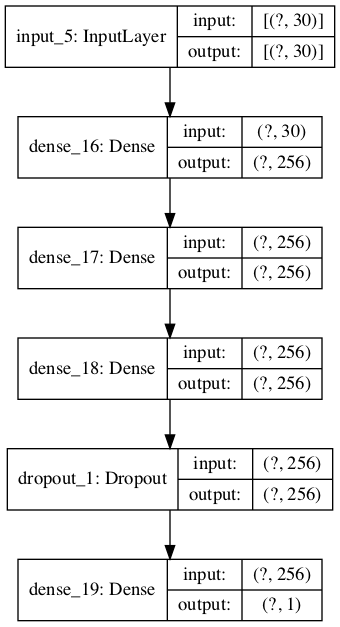

In [25]:
tf.keras.utils.plot_model(model, 'neural_network_shape_info.png', show_shapes=True)